<a href="https://colab.research.google.com/github/tiagogoto/mecanica-refrigeracao/blob/main/ciclo_de_refrigera%C3%A7%C3%A3o_11_60.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício 11-60 Cengel
Considere um sistema de refrigeração em cascata de dois estágios operando entre os limites de pressão de 1,2 MPa e 200 kPa com o refrigerante-134a como fluido de trabalho. A rejeição de ca-lor do ciclo inferior para o ciclo superior ocorre em um trocador de calor contracorrente e adiabático no qual a pressão dos ciclos superior e inferior correspondem a 0,4 MPa e 0,5 MPa, respectivamente. Em ambos os ciclos, o refrigerante é líquido saturado, na saída do condensador, e vapor saturado, na entrada do compressor, cuja e-ficiência isentrópica é de 80%. Considerando que a vazão mássica do refrigerante através do ciclo inferior é de 0,15 kg/s, determine (a) a vazão mássica do refrigerante através do ciclo superior, (b) a taxa de remoção de calor do espaço refrigerado e (c) o COP desse refrigerador. Respostas: (a) 0,212 kg/s; (b) 25,7 kW; (c) 2,68

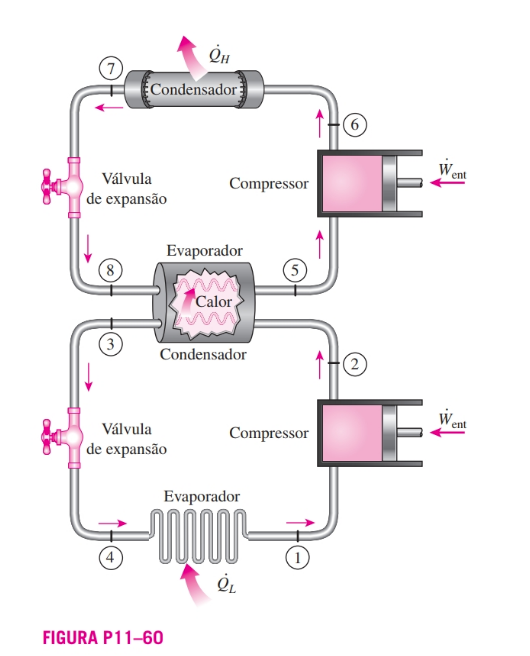

## Instalação e importação das Bibliotecas

In [ ]:
!pip install coolprop

In [ ]:
from CoolProp.CoolProp import PropsSI

## Dados do Exercício e os estados

#### Ponto 1

In [ ]:
fluido = 'R134a'
# Estado 1
P1 = 200*10**3 #Pa
x1 = 1 # vapor saturado x =1

T1 = PropsSI('T', 'P', P1, 'Q', x1, fluido )
print("Temperatura de evaporação, T1 = ", T1 - 273.15, "°C")
h1 = PropsSI('H', 'P', P1, 'Q', x1, fluido)
print("Entalpia, h1 = ", h1 / 1000, "kJ/kg")
s1 = PropsSI('S', 'P', P1, 'Q', x1, fluido)
print("Entropia, s1 = ", s1 / 1000, "kJ/kg")

Temperatura de evaporação, T1 =  -10.076272460233042 °C
Entalpia, h1 =  392.6188955357572 kJ/kg
Entropia, s1 =  1.7334045833832779 kJ/kg


#### Estado 2

Lembrando, a equação da eficiência isoentrópica
$$\eta_{c} = \frac{h_{2s} - h_1}{h_{2} - h_1} $$# 
Eficiência isoentrópica do compressor, $ \eta_c = 80 %$


In [ ]:
eta_c = 0.8
P2 = 500*10**3 #Pa

s2s = s1  #Para processo isoentrópico
# a entalpia h2 para isoentrópico
h2s = PropsSI('H', 'P', P2, 'S', s2s, fluido)
print("Entalpia, h2s = ", h2s / 1000, "kJ/kg")

#entalpia real

h2 = (h2s - h1)/eta_c + h1
print("Entalpia, h2 = ", h2 / 1000, "kJ/kg")

T2 = PropsSI('T', 'P', P2, 'H', h2, fluido )
print("T2 = ", T2 -273.15, "°C")


Entalpia, h2s =  411.46118114595976 kJ/kg
Entalpia, h2 =  416.1717525485104 kJ/kg
T2 =  24.762160375151495 °C


#### Ponto 3

In [ ]:
x3 = 0 # liq. Saturado
P3 = P2

h3 = PropsSI('H', 'P', P3, 'Q', x3, fluido)
print("h3 = ", h3/1000, "kJ/kg")


h3 =  221.5016736533675 kJ/kg


#### Ponto 4

In [ ]:
# Processo isoentálpico, então h3 = h4
h4 = h3

#### Ponto 5

In [ ]:
x5 = 1 # vapor saturado
P5 = 400*10**3 #Pa


T5 = PropsSI('T', 'P', P5, 'Q', x5, fluido )
print("Temperatura de evaporação, T5 = ", T5 - 273.15, "°C")
h5 = PropsSI('H', 'P', P5, 'Q', x5, fluido)
print("Entalpia, h5 = ", h5 / 1000, "kJ/kg")
s5 = PropsSI('S', 'P', P5, 'Q', x5, fluido)
print("Entropia, s5 = ", s5 / 1000, "kJ/kg")

Temperatura de evaporação, T5 =  8.930603944905556 °C
Entalpia, h5 =  403.7194114632352 kJ/kg
Entropia, s5 =  1.7225933514633869 kJ/kg


#### Ponto 6

In [ ]:
P6 = 1200*10**3 #Pa

s6s = s5  #Para processo isoentrópico
# a entalpia h2 para isoentrópico
h6s = PropsSI('H', 'P', P6, 'S', s6s, fluido)
print("Entalpia, h6s = ", h6s / 1000, "kJ/kg")

#entalpia real

h6 = (h6s - h5)/eta_c + h5
print("Entalpia, h6 = ", h6 / 1000, "kJ/kg")

T6 = PropsSI('T', 'P', P6, 'H', h6, fluido )
print("T6 = ", T6 -273.15, "°C")

Entalpia, h6s =  426.495831858532 kJ/kg
Entalpia, h6 =  432.18993695735617 kJ/kg
T6 =  55.01648933937622 °C


#### Ponto 7

In [ ]:
P7 = P6 # mesma pressão do ponto 6
x7 = 0 # liquido saturado, consideração dada pelo enunciado do exercício


h7 = PropsSI('H', 'P', P7, 'Q', x7, fluido)
print("h7 = ", h7/1000, "kJ/kg")



h7 =  265.94720054814815 kJ/kg


#### Ponto 8 
Processo isoentálpico na válvula de expansão

In [ ]:
h8 = h7

## Solução do Exercício
### a) a vazão mássica do refrigerante através do ciclo superior, 

Aplicando o balanço de energia no trocador de calor, e isolando o termo $\dot{m}_{sup}$, temos:

$$ \dot{m}_{sup} =\frac{\dot{m}_{inf} (h_2 - h_3)}{(h_5 - h_8)} $$

In [ ]:
# fluxo mássico inferior dado pelo exercício, 
m_inf = 0.15 #kg/s
m_sup = m_inf * (h2 - h3) / (h5 - h8)
print("fluxo mássico do ciclo superior, m_sup = ", m_sup, "kg/s")

fluxo mássico do ciclo superior, m_sup =  0.21194776247198752 kg/s


#### b) a taxa de remoção de calor do espaço refrigerado

Aplicando o balanço de energia no evaporador do ciclo inferior, obtemos:
$$ \dot{Q}_{L} =  \dot{m}_{inf} (h_1 - h_4)$$

In [ ]:
Q_L =  m_inf * (h1 - h4)
print("Capacaidade de refrigeração, Q_L =", Q_L/1000, "kW")

Capacaidade de refrigeração, Q_L = 25.667583282358454 kW


#### c)  o COP desse refrigerador
Aplicando o balanço de energia no compressor 1:
$$\dot{W}_1  = \dot{m}_{inf} (h_2 - h_1)$$

Aplicando o balanço de energia no compressor 2:
$$\dot{W}_2  = \dot{m}_{sup} (h_6 - h_5)$$

A equação do COP:
$$ COP = \frac{\dot{Q}_L}{\dot{W}_c}  = \frac{\dot{Q}_L}{\dot{W}_1 + \dot{W}_2} $$

In [ ]:
W_1 = m_inf * (h2 - h1)
print("W1 = ", W_1/1000, "kW")

W_2 = m_sup * (h6 - h5)
print("W2 = ", W_2/1000, "kW")

# COP

COP = Q_L / (W_1 + W_2)
print("COP = ", COP)

W1 =  3.5329285519129887 kW
W2 =  6.034264174880613 kW
COP =  2.682875114501934
